# Mapping the Gender Pay Gap: Insights for Equity and Action

This notebook investigates the pay gap based on gender across different races and education levels in the US. 

The data comes from [Wages By Education](https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022), from Kaggle.

In this notebook:

1. [Setup](#setup)
2. [Visualization](#visualization)<br>
    2.1. [By Gender](#by.gender)<br>
        2.1.1. [Focused DataFrames](#foc.dfs)<br>
        2.1.2. [Salary Progression for Men](#prog.men)<br>
        2.1.3. [Salary Progression for Women](#prog.women)<br>
        2.1.4. [Pay Gap between Men and Women](#pay.gap)<br>
        2.1.5. [Salary Progression Comparison for Men & Women](#prog.compare)<br>
    2.2. [By Race](#by.race)<br>
        2.2.1. [For Women](#race.women)<br>
        2.2.2. [For Men](#race.men)<br>
3. [Quantifiying Disparity](#quantify)<br>
    3.1. [Feature Engineering (Creating New Columns)](#feature.eng)<br>
    3.2. [Feature Engineering (Transforming Cat to Numeric)](#feature.eng.2)
4. [Picking Independent Variables](#feature.pick)


<a id='setup'></a>
## 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('wages_by_education.csv')

In [3]:
df.head() #the columns include average hourly wages

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [4]:
df.shape

(50, 61)

We don't see any null values in the data and all columns are of type `float`. No conversion is needed. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

Checking the preliminary stats, nothing raises a red flag. The means and standard deviations indicate no outliers in the data.

In [6]:
df.describe().round(2)

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,1997.50,15.70,20.88,23.22,34.77,43.90,17.57,23.83,26.33,39.99,...,12.77,16.46,18.96,27.92,36.19,12.81,16.60,18.96,26.49,34.75
std,14.58,1.13,0.74,0.78,3.31,5.31,1.64,1.23,0.90,3.73,...,0.46,0.70,0.73,2.42,3.12,0.75,0.69,0.95,3.22,5.21
min,1973.00,13.95,19.62,22.04,30.04,35.32,15.39,22.11,24.78,35.16,...,11.77,15.53,17.71,23.54,29.34,11.35,15.53,17.04,18.85,20.93
25%,1985.25,14.89,20.39,22.54,31.88,38.76,16.25,22.94,25.80,36.61,...,12.45,15.86,18.41,25.98,33.87,12.27,16.11,18.29,24.24,30.96
50%,1997.50,15.34,20.85,23.18,34.20,44.08,16.90,23.70,26.36,39.48,...,12.78,16.30,18.79,28.52,37.16,12.72,16.46,18.93,27.39,36.08
75%,2009.75,16.50,21.48,23.70,37.12,47.56,18.61,24.31,27.01,42.34,...,13.03,16.99,19.58,30.11,38.31,13.08,16.98,19.64,28.70,38.37
max,2022.00,18.06,22.70,25.44,41.65,53.74,21.18,26.90,28.55,49.01,...,13.89,18.30,20.45,31.38,42.44,14.97,18.50,21.14,31.55,44.15


<a id='visualization'></a>

## 2. Visualization

<a id='by.gender'></a>

### 2.1. By Gender 

<a id='foc.dfs'></a>
#### 2.1.1. Focued DataFrames

In order to make for better code, I define new dataframes for *men* and *women*, as well as the salary gap between the two group in `df_men`, `df_women` and `df_diff`, respectively. For this, I am using the information available in the generic columns, without going into details of race. 

Firt, I need to set the index to column `year`, because I want to have time series plot and need to keep this information.

In [7]:
df.set_index('year', inplace = True)

In [8]:
df.head()

,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,,
2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,63.51,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,63.52,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,62.70,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,59.93,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,59.73,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


Now, defining dataframes for *men* and *women* separately.

In [9]:
df_men = df.loc[:, df.columns.str.contains(r'^men')] 

#we could use `startswith()`, too
#df_men = df.loc[:, df.columns.str.startswith('men')]

A sanity check to make sure I isolated the correct columns from the original dataframe.

In [10]:
df_men.columns.shape

(5,)

In [11]:
columns = df.columns
counter = 0
for item in columns:
    if item.startswith('men'):
        counter+=1
        
counter

5

The number of columns in the new `df_men` equals the number of columns having information about salaries of *men* in the original dataframe. So, we are good. 

In [12]:
df_men.shape

(50, 5)

In [13]:
df_men.head()

,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree
year,,,,,
2022,17.99,24.08,27.96,49.01,63.51
2021,18.34,24.36,27.96,47.83,63.52
2020,18.76,25.09,28.55,48.15,62.70
2019,17.55,23.99,26.99,45.74,59.93
2018,17.70,23.72,26.61,44.97,59.73


In [14]:
df_men.describe().round(2)

,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree
count,50.00,50.00,50.00,50.00,50.00
mean,17.57,23.83,26.33,39.99,49.43
std,1.64,1.23,0.90,3.73,7.20
min,15.39,22.11,24.78,35.16,38.72
25%,16.25,22.94,25.80,36.61,43.07
50%,16.90,23.70,26.36,39.48,48.94
75%,18.61,24.31,27.01,42.34,54.51
max,21.18,26.90,28.55,49.01,63.52


Now, we do the same for *women*.

In [15]:
df_women = df.loc[:, df.columns.str.startswith('women')]
df_women.shape

(50, 5)

In [16]:
df_women.head()

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree
year,,,,,
2022,14.33,18.93,21.76,34.39,44.34
2021,14.36,19.36,21.97,35.08,44.80
2020,14.40,19.35,22.35,35.41,46.04
2019,13.96,18.48,21.09,33.80,44.22
2018,13.36,18.49,20.91,33.03,43.19


In [17]:
df_women.describe().round(2)

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree
count,50.00,50.00,50.00,50.00,50.00
mean,12.85,17.57,19.94,28.93,36.98
std,0.57,0.85,1.28,3.76,5.16
min,11.75,16.45,17.91,22.94,28.47
25%,12.50,16.89,18.78,25.46,32.28
50%,12.81,17.37,19.98,29.42,38.34
75%,13.08,18.32,21.06,31.98,40.88
max,14.40,19.36,22.35,35.41,46.04


<a id='prog.men'></a>

#### 2.1.2. Salary Progression for Men

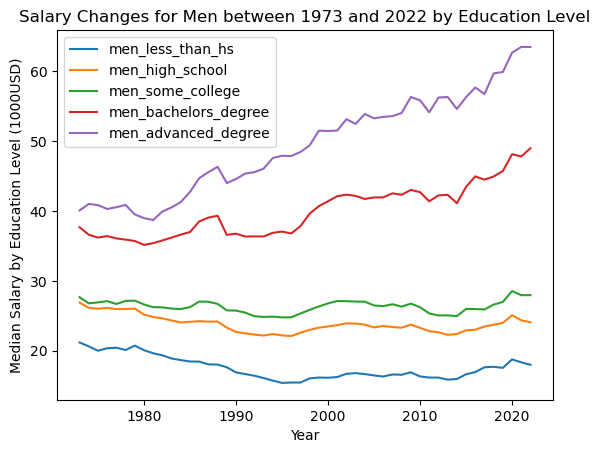

In [18]:
plt.plot(df_men.index, df_men.iloc[:, 0:]) 
plt.xlabel('Year')
plt.ylabel('Median Salary by Education Level (1000USD)')
plt.title('Salary Changes for Men between 1973 and 2022 by Education Level')
plt.legend(df_men.columns)
plt.show()

<a id='prog.women'></a>

#### 2.1.3. Salary Progression for Women

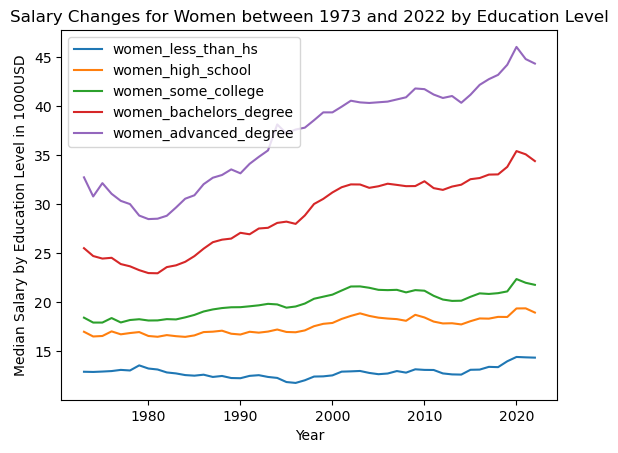

In [19]:
plt.plot(df_women.index, df_women.iloc[:, 0:]) #modify the indexing and fix the indexes here n
plt.xlabel('Year')
plt.ylabel('Median Salary by Education Level in 1000USD')
plt.title('Salary Changes for Women between 1973 and 2022 by Education Level')
plt.legend(df_women.columns)
plt.show()

Both plots show that the salary ranges for less educated men and women has stayed almost the same throughout the years. However, for both groups with bachelor's degree or advanced education, the salary is showing an upward trend during the years. One thing we can look at is this increase ratio in two groups to see if there is a discrepency there as well. 




<a id='pay.gap'></a>

#### 2.1.4. Pay Gap between Men and Women

While looking at the two dataframes, i.e. `df_men` and `df_women` shows the gap between the two groups, let's quantify this gap below:

Now, I define a new dataframe with the salary gaps between different educational backgrounds, and assign it to `df_diff`. 

In [20]:
df_diff = pd.DataFrame()

df_diff['some_college'] = df['men_some_college'] - df['women_some_college']
df_diff['less_than_hs'] = df['men_less_than_hs'] - df['women_less_than_hs']
df_diff['high_school'] = df['men_high_school'] - df['women_high_school']
df_diff['bachelors_degree'] = df['men_bachelors_degree'] - df['women_bachelors_degree']
df_diff['advanced_degree'] = df['men_advanced_degree'] - df['women_advanced_degree']

In [21]:
df_diff.head()

,some_college,less_than_hs,high_school,bachelors_degree,advanced_degree
year,,,,,
2022,6.20,3.66,5.15,14.62,19.17
2021,5.99,3.98,5.00,12.75,18.72
2020,6.20,4.36,5.74,12.74,16.66
2019,5.90,3.59,5.51,11.94,15.71
2018,5.70,4.34,5.23,11.94,16.54


In [22]:
df_diff.describe().round(2)

,some_college,less_than_hs,high_school,bachelors_degree,advanced_degree
count,50.00,50.00,50.00,50.00,50.00
mean,6.39,4.71,6.26,11.06,12.46
std,1.43,1.50,1.64,1.43,2.47
min,4.70,3.09,4.44,8.79,7.36
25%,5.29,3.62,5.15,10.09,10.70
50%,5.84,3.86,5.44,10.86,12.11
75%,7.72,5.94,7.48,12.26,13.92
max,9.26,8.29,9.93,14.62,19.17


In [23]:
print('Maximum hourly pay gap between men and women with less than high school education:', round(df_diff['less_than_hs'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with high school education:', round(df_diff['high_school'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with some college education:', round(df_diff['some_college'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with bachelors degree:', round(df_diff['bachelors_degree'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with advanced degree:', round(df_diff['advanced_degree'].max(), 2) ) 


Maximum hourly pay gap between men and women with less than high school education: 8.29
Maximum hourly pay gap between men and women with high school education: 9.93
Maximum hourly pay gap between men and women with some college education: 9.26
Maximum hourly pay gap between men and women with bachelors degree: 14.62
Maximum hourly pay gap between men and women with advanced degree: 19.17


We see that the gap increases as the level of education increases as well. Let's see this in a plot.

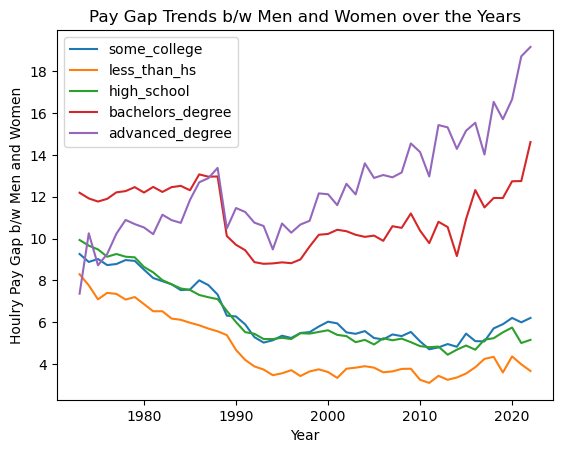

In [24]:
plt.plot(df_diff)
plt.xlabel('Year')
plt.ylabel('Houlry Pay Gap b/w Men and Women')
plt.title('Pay Gap Trends b/w Men and Women over the Years')
plt.legend(df_diff.columns)
plt.show()

<a id='prog.compare'></a>

#### 2.1.5. Salary Progression Comparison for Men & Women

The goal in this section is to see if the rate of salary increases over the years match for men and women. To do so, we need to calculate the rate by getting the numbers in the first row and the last row in `df_men` and `df_women`, because the first row has the hourly salary rate for 2022 and the last row for 1973. Then, we can calculate the increase rate by subtracting the second number from the first one, dividing it to the second one and multiplying it by 100:

<br>
<br>

<div style="margin-left: 200px">
        
$rate = \frac{\text{Salary}_{2022} - \text{Salary}_{1973}}{\text{Salary}_{1973}} \times 100$

</div>

<br>

To do so systematically and without the need to calculate the rate for each column manually, let's define a function that does it for us in one line:

In [25]:
def calculate_rate(df):
    rate = {}
    df = df.reset_index(drop=True)

    for column in df.columns:
        rate_column = (df.loc[0, column] - df.loc[df.shape[0]-1, column]).round(2)
        rate[column] = str(rate_column)+'%'
    return rate

In [26]:
rate_men = calculate_rate(df_men)
rate_men

{'men_less_than_hs': '-3.19%',
 'men_high_school': '-2.82%',
 'men_some_college': '0.29%',
 'men_bachelors_degree': '11.32%',
 'men_advanced_degree': '23.42%'}

In [27]:
rate_women = calculate_rate(df_women)
rate_women

{'women_less_than_hs': '1.44%',
 'women_high_school': '1.96%',
 'women_some_college': '3.35%',
 'women_bachelors_degree': '8.89%',
 'women_advanced_degree': '11.61%'}

So, overall, we can see that the pay increase rate for men with higher education is bigger than that for women. The difference of increase rate for men and women with advanced degrees is more than twice (23.42-11.61)/23.42 * 100 = 50.34% higher increase rate for men compared to women.

The gap is smaller for bachelor's degree holders and it actually is the opposite for college degrees and lower educational levels, with the salary rate for men actually decreasing between 1973 and 2022. 

<a id='by.race'></a>

## 2.2. By Race

We have three racial groups: *hispanic*, *white* and *black*. 

<a id='race.women'></a>

### 2.2.1. For Women

First, we store the information for women in a new dataframe. By checking the column names, we make sure we have not pulled incorrect data.

In [28]:
df_women_all = df.loc[:, df.columns.str.contains('women')]

In [29]:
df_women_all.columns

Index(['women_less_than_hs', 'women_high_school', 'women_some_college',
       'women_bachelors_degree', 'women_advanced_degree',
       'white_women_less_than_hs', 'white_women_high_school',
       'white_women_some_college', 'white_women_bachelors_degree',
       'white_women_advanced_degree', 'black_women_less_than_hs',
       'black_women_high_school', 'black_women_some_college',
       'black_women_bachelors_degree', 'black_women_advanced_degree',
       'hispanic_women_less_than_hs', 'hispanic_women_high_school',
       'hispanic_women_some_college', 'hispanic_women_bachelors_degree',
       'hispanic_women_advanced_degree'],
      dtype='object')

Let's compare the salaries of women across three races.

In [30]:
df_women_all.head()

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,white_women_less_than_hs,white_women_high_school,white_women_some_college,white_women_bachelors_degree,white_women_advanced_degree,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,
2022,14.33,18.93,21.76,34.39,44.34,13.84,19.56,22.52,35.31,44.45,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,14.36,19.36,21.97,35.08,44.80,13.77,20.08,22.73,36.11,44.82,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,14.40,19.35,22.35,35.41,46.04,14.20,20.06,23.31,36.20,45.58,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,13.96,18.48,21.09,33.80,44.22,13.44,19.22,21.99,34.47,43.83,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,13.36,18.49,20.91,33.03,43.19,13.45,19.52,21.90,33.78,43.31,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


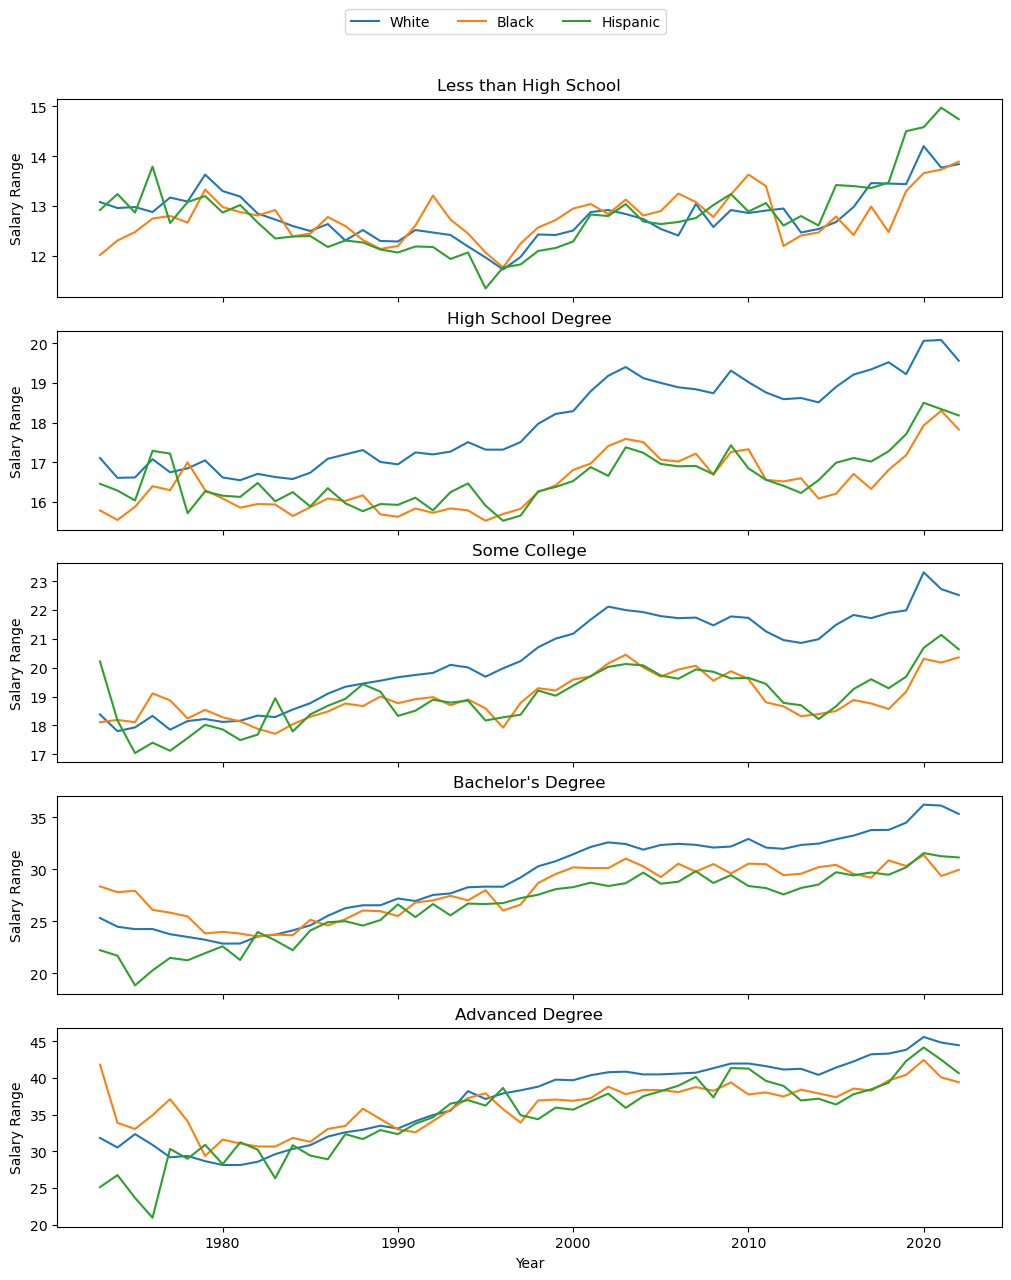

In [31]:
figure, ax = plt.subplots(5,1, sharex = True, figsize = (10,12), constrained_layout=True)

# plot less_than_hs education
ax[0].plot(df_women_all.index, df_women_all['white_women_less_than_hs'], label = 'White')
ax[0].plot(df_women_all.index, df_women_all['black_women_less_than_hs'], label = 'Black')
ax[0].plot(df_women_all.index, df_women_all['hispanic_women_less_than_hs'], label = 'Hispanic')

# plot high_school education
ax[1].plot(df_women_all.index, df_women_all['white_women_high_school'])
ax[1].plot(df_women_all.index, df_women_all['black_women_high_school'])
ax[1].plot(df_women_all.index, df_women_all['hispanic_women_high_school'])

# plot some_college education
ax[2].plot(df_women_all.index, df_women_all['white_women_some_college'])
ax[2].plot(df_women_all.index, df_women_all['black_women_some_college'])
ax[2].plot(df_women_all.index, df_women_all['hispanic_women_some_college'])

# plot bachelors_degree education
ax[3].plot(df_women_all.index, df_women_all['white_women_bachelors_degree'])
ax[3].plot(df_women_all.index, df_women_all['black_women_bachelors_degree'])
ax[3].plot(df_women_all.index, df_women_all['hispanic_women_bachelors_degree'])

# plot advanced_degree education
ax[4].plot(df_women_all.index, df_women_all['white_women_advanced_degree'])
ax[4].plot(df_women_all.index, df_women_all['black_women_advanced_degree'])
ax[4].plot(df_women_all.index, df_women_all['hispanic_women_advanced_degree'])

# label the axes
plt.xlabel('Year') # they share x-axis, labeling once is enough
# to have the y-axis label on each subplot, a loop is utilized
for i in range(5):
    ax[i].set_ylabel('Salary Range')

# giving appropriate titles to the subplots
ax[0].set_title('Less than High School')
ax[1].set_title('High School Degree')
ax[2].set_title('Some College')
ax[3].set_title("Bachelor's Degree")
ax[4].set_title('Advanced Degree')

# adding legend 
lines, labels = ax[0].get_legend_handles_labels()
figure.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.06))


plt.show();


There is a gap between *white* women and the other two racial groups, but the gap seems to decrease as the level of education increases. Let's quantify this, though. But, before that, let's check the same for men for racial disparatities. To do so, I create a new dataframe pulling the information for men including their racial identities.

<a id='race.men'></a>

### 2.2.2. For Men

In [32]:
df_men_all = df.loc[:, df.columns.str.contains(r'_men')]

In [33]:
df_men_all.head()

,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelors_degree,white_men_advanced_degree,black_men_less_than_hs,black_men_high_school,black_men_some_college,black_men_bachelors_degree,black_men_advanced_degree,hispanic_men_less_than_hs,hispanic_men_high_school,hispanic_men_some_college,hispanic_men_bachelors_degree,hispanic_men_advanced_degree
year,,,,,,,,,,,,,,,
2022,17.14,25.92,29.93,51.23,63.86,16.38,20.73,22.58,37.63,52.91,18.67,22.32,25.49,41.48,57.08
2021,18.13,26.03,29.79,50.06,64.04,15.38,20.86,22.63,36.95,49.01,18.98,22.70,25.58,39.61,55.60
2020,18.97,26.73,30.40,50.15,63.50,15.52,21.22,23.57,36.70,51.67,19.26,23.33,25.69,41.00,53.58
2019,17.66,25.58,28.90,47.76,60.84,15.07,20.22,22.02,33.73,46.87,17.93,22.33,24.35,39.56,52.24
2018,17.96,25.49,28.41,47.28,61.27,14.27,19.36,21.82,33.42,46.42,18.05,22.04,24.20,37.27,51.27


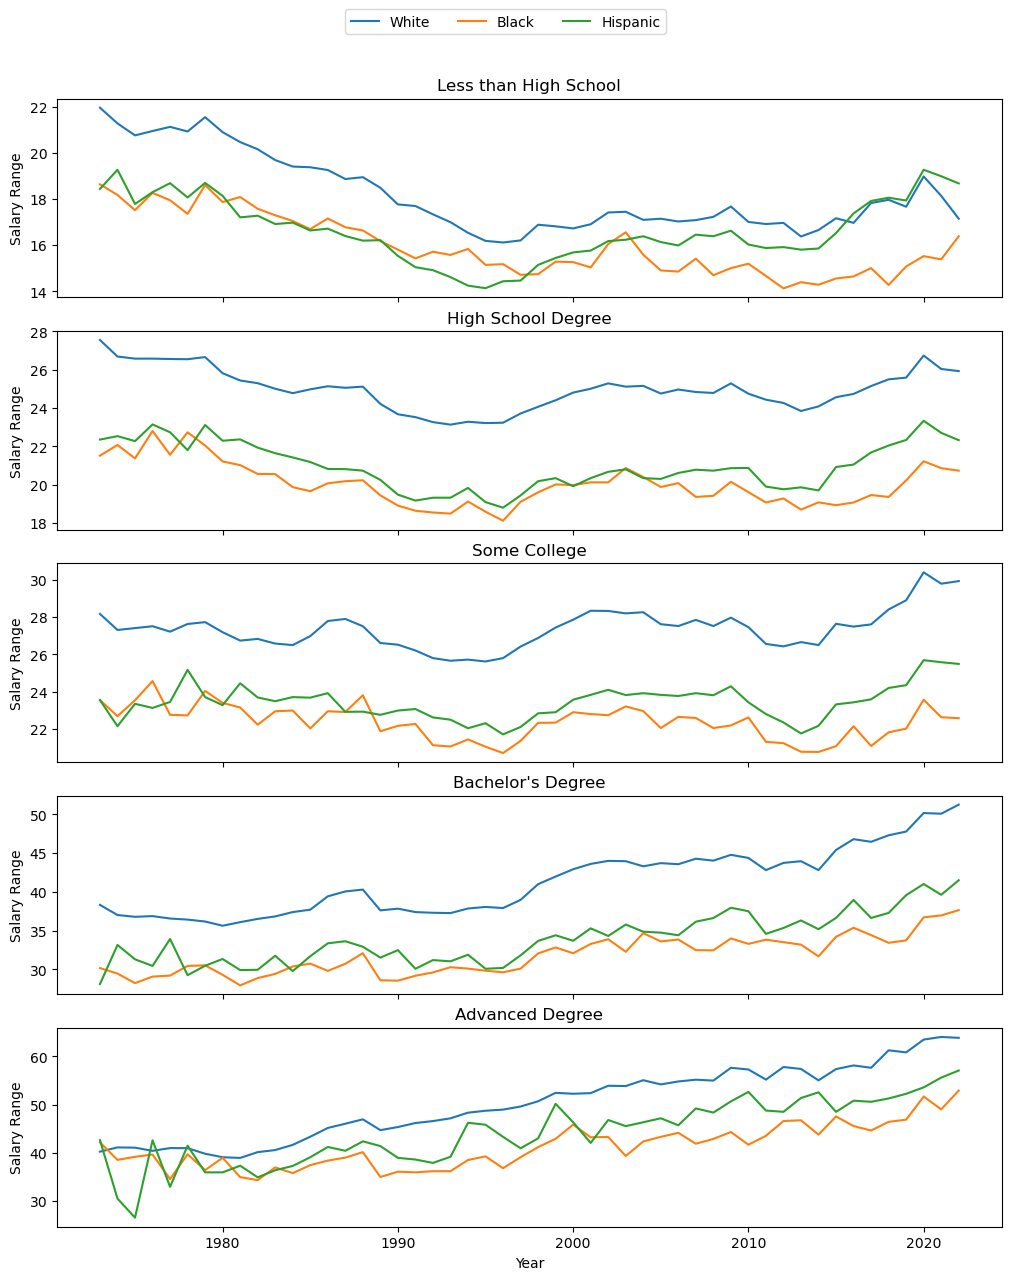

In [34]:
figure, ax = plt.subplots(5,1, sharex = True, figsize = (10,12), constrained_layout=True)

# plot less_than_hs education
ax[0].plot(df_men_all.index, df_men_all['white_men_less_than_hs'], label = 'White')
ax[0].plot(df_men_all.index, df_men_all['black_men_less_than_hs'], label = 'Black')
ax[0].plot(df_men_all.index, df_men_all['hispanic_men_less_than_hs'], label = 'Hispanic')

# plot high_school education
ax[1].plot(df_men_all.index, df_men_all['white_men_high_school'])
ax[1].plot(df_men_all.index, df_men_all['black_men_high_school'])
ax[1].plot(df_men_all.index, df_men_all['hispanic_men_high_school'])

# plot some_college education
ax[2].plot(df_men_all.index, df_men_all['white_men_some_college'])
ax[2].plot(df_men_all.index, df_men_all['black_men_some_college'])
ax[2].plot(df_men_all.index, df_men_all['hispanic_men_some_college'])

# plot bachelors_degree education
ax[3].plot(df_men_all.index, df_men_all['white_men_bachelors_degree'])
ax[3].plot(df_men_all.index, df_men_all['black_men_bachelors_degree'])
ax[3].plot(df_men_all.index, df_men_all['hispanic_men_bachelors_degree'])

# plot advanced_degree education
ax[4].plot(df_men_all.index, df_men_all['white_men_advanced_degree'])
ax[4].plot(df_men_all.index, df_men_all['black_men_advanced_degree'])
ax[4].plot(df_men_all.index, df_men_all['hispanic_men_advanced_degree'])

# label the axes
plt.xlabel('Year') # they share x-axis, labeling once is enough
# to have the y-axis label on each subplot, a loop is utilized
for i in range(5):
    ax[i].set_ylabel('Salary Range')

# giving appropriate titles to the subplots
ax[0].set_title('Less than High School')
ax[1].set_title('High School Degree')
ax[2].set_title('Some College')
ax[3].set_title("Bachelor's Degree")
ax[4].set_title('Advanced Degree')

# adding legend 
lines, labels = ax[0].get_legend_handles_labels()
figure.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.06))


plt.show();


We see a similar disparity, if not more, between white men and the other two groups. 

<a id='quantify'></a>

## 3. Quantifiying Disparity

In order to make our task easier here, we need to do some feature engineering.

<a id='feature.eng'></a>

### 3.1. Feature Engineering (Creating New Columns)

Our data is "wide", and the features we are interested in are not stored as separate columns. Therefore, we need to do some engineering to make the shape of the data in a way that is suitable for analysis. To this end, I am going to create 4 separate columns off of our existing columns:

- Education
- Race
- Gender
- Salary

Let's first remind ourselves how the data looks currently.

In [35]:
df.head()

,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,,
2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,63.51,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,63.52,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,62.70,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,59.93,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,59.73,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


The first 5 columns do no have specific and sufficient information, and so deleting them sounds reasonable.


In [36]:
df = df.iloc[:, 5:]
df.head()

,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,,
2022,17.99,24.08,27.96,49.01,63.51,14.33,18.93,21.76,34.39,44.34,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,18.34,24.36,27.96,47.83,63.52,14.36,19.36,21.97,35.08,44.80,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,18.76,25.09,28.55,48.15,62.70,14.40,19.35,22.35,35.41,46.04,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,17.55,23.99,26.99,45.74,59.93,13.96,18.48,21.09,33.80,44.22,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,17.70,23.72,26.61,44.97,59.73,13.36,18.49,20.91,33.03,43.19,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


Next, we need to `melt` our dataframe to change it from a wide format to a long format.

In [37]:
df_melt = df.melt(var_name = 'Education', value_name = 'Hourly.Salary', ignore_index = False)

In [38]:
df_melt.head()

,Education,Hourly.Salary
year,,
2022,men_less_than_hs,17.99
2021,men_less_than_hs,18.34
2020,men_less_than_hs,18.76
2019,men_less_than_hs,17.55
2018,men_less_than_hs,17.70


Now, we need to separate the *Education* column into three distinct columns encompassing the information about *Sex*, *Race* and *Education*.

In [39]:
df_melt['Sex'] = df_melt['Education'].apply(lambda x: 'male' if x.startswith('men') 
                                            else 'female' if x.startswith('women') 
                                            else None)

In [40]:
df_melt['Race'] = df_melt['Education'].apply(lambda x: 'white' if x.startswith('white')
                                             else 'black' if x.startswith('black')
                                             else 'hispanic')

In [41]:
df_melt.head()

,Education,Hourly.Salary,Sex,Race
year,,,,
2022,men_less_than_hs,17.99,male,hispanic
2021,men_less_than_hs,18.34,male,hispanic
2020,men_less_than_hs,18.76,male,hispanic
2019,men_less_than_hs,17.55,male,hispanic
2018,men_less_than_hs,17.70,male,hispanic


In [42]:
# Define a list of the actual education levels
education_levels = [
    'less_than_hs',
    'high_school',
    'some_college',
    'bachelors_degree',
    'advanced_degree'
]

# Function to extract matching education level from label
def extract_education(label):
    for level in education_levels:
        if label.endswith(level):
            return level
    return None  # fallback if no match found

# Apply to our column
df_melt['Education'] = df_melt['Education'].apply(extract_education)


In [43]:
# Confirm the column ONLY has the info we need
df_melt['Education'].unique()

array(['less_than_hs', 'high_school', 'some_college', 'bachelors_degree',
       'advanced_degree'], dtype=object)

In [44]:
# Confirm the column ONLY has the info we need
df_melt['Sex'].unique()

array(['male', 'female', None], dtype=object)

In [45]:
# Confirm the column ONLY has the info we need
df_melt['Race'].unique()

array(['hispanic', 'white', 'black'], dtype=object)

Below, we see that we have distinct columns for the three **independent** variables, i.e. Sex, Race and Education, and one column for our dependent variable, i.e. Hourly.Salary.

In [46]:
df_melt.head()

,Education,Hourly.Salary,Sex,Race
year,,,,
2022,less_than_hs,17.99,male,hispanic
2021,less_than_hs,18.34,male,hispanic
2020,less_than_hs,18.76,male,hispanic
2019,less_than_hs,17.55,male,hispanic
2018,less_than_hs,17.70,male,hispanic


Let's move the dependent varaible to the last column to enhance readibility. 

In [47]:
df_melt = df_melt[['Sex', 'Race', 'Education', 'Hourly.Salary']]

In [48]:
df_melt.head()

,Sex,Race,Education,Hourly.Salary
year,,,,
2022,male,hispanic,less_than_hs,17.99
2021,male,hispanic,less_than_hs,18.34
2020,male,hispanic,less_than_hs,18.76
2019,male,hispanic,less_than_hs,17.55
2018,male,hispanic,less_than_hs,17.70


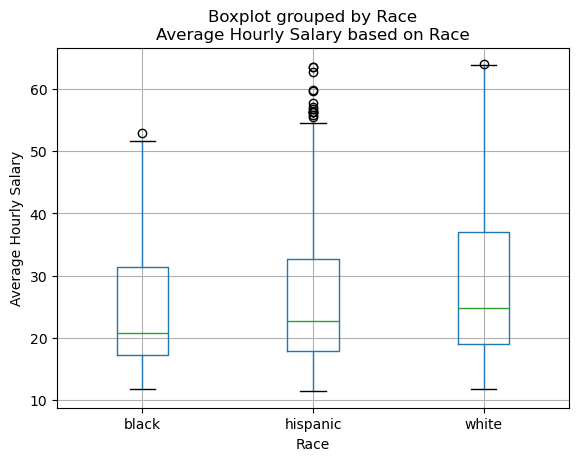

In [49]:
df_melt.boxplot(column = ['Hourly.Salary'], by = 'Race')
plt.xlabel('Race')
plt.ylabel('Average Hourly Salary')
plt.title('Average Hourly Salary based on Race')

plt.show();

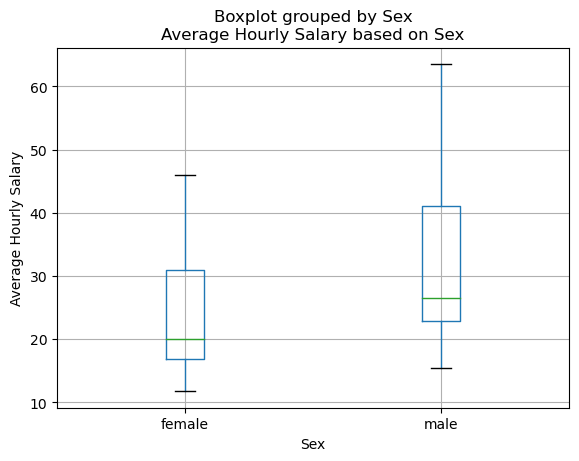

In [50]:
df_melt.boxplot(column = ['Hourly.Salary'], by = 'Sex')
plt.xlabel('Sex')
plt.ylabel('Average Hourly Salary')
plt.title('Average Hourly Salary based on Sex')

plt.show();

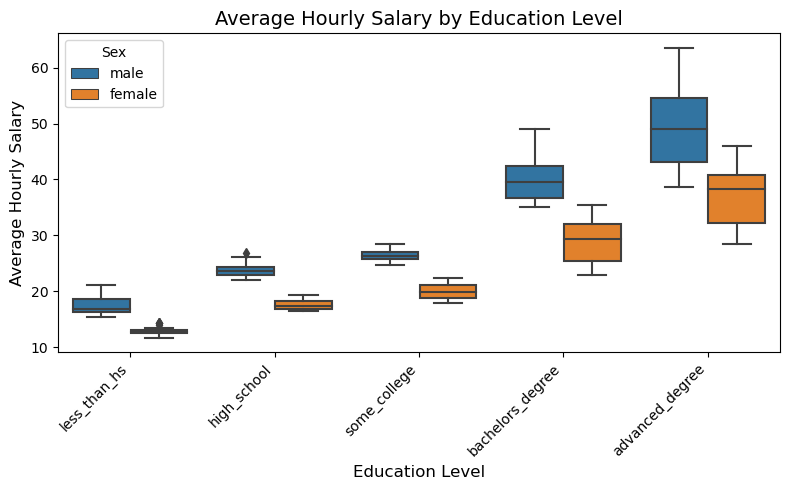

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_melt, x='Education', y='Hourly.Salary', hue = 'Sex')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Hourly Salary', fontsize=12)
plt.title('Average Hourly Salary by Education Level', fontsize=14)

plt.tight_layout()
plt.show()


We can see that at every educational level, men are paid more than women. In order to run some quantitave analysis, we need to do some more feature engineering, by means of which, we tranform our categorical features into numeric ones.


<a id='feature.eng.2'></a>

### 3.2. Feature Engineering (Transforming Cat to Numeric)

In [52]:
df_melt.Education.unique()

array(['less_than_hs', 'high_school', 'some_college', 'bachelors_degree',
       'advanced_degree'], dtype=object)

I am going to use the following tranformations:
    
- Sex:
    - male = 0, female = 1
- Race:
    - white = 0, black = 1, hispanic = 2
- Education:
    - less_than_hs = 0
    - high_school = 1
    - some_college = 2
    - bachelors_degree = 3
    - advanced_degree = 4 

In [53]:
df_num = df_melt

In [54]:
df_num['Sex'] = df_num['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [55]:
df_num['Race'] = df_num['Race'].apply(lambda x: 0 if x == 'white' else 1 if x == 'black' else 2)

In [56]:
df_num['Education'] = df_num['Education'].apply(lambda x: 0 if x == 'less_than_hs'
                                                else 1 if x == 'high_school'
                                                else 2 if x == 'some_college'
                                                else 3 if x == 'bachelors_degree'
                                                else 4)

In [57]:
df_num.head()

,Sex,Race,Education,Hourly.Salary
year,,,,
2022,0,2,0,17.99
2021,0,2,0,18.34
2020,0,2,0,18.76
2019,0,2,0,17.55
2018,0,2,0,17.70


In [58]:
df_num['Race'].unique()

array([2, 0, 1])

In [59]:
df_num['Sex'].unique()

array([0, 1])

In [60]:
df_num['Education'].unique()

array([0, 1, 2, 3, 4])

<a id='feature.pick'></a>
## 4. Picking Independent Variables

Let's first start by looking at pairplots of the data to see if anything catches the eye.

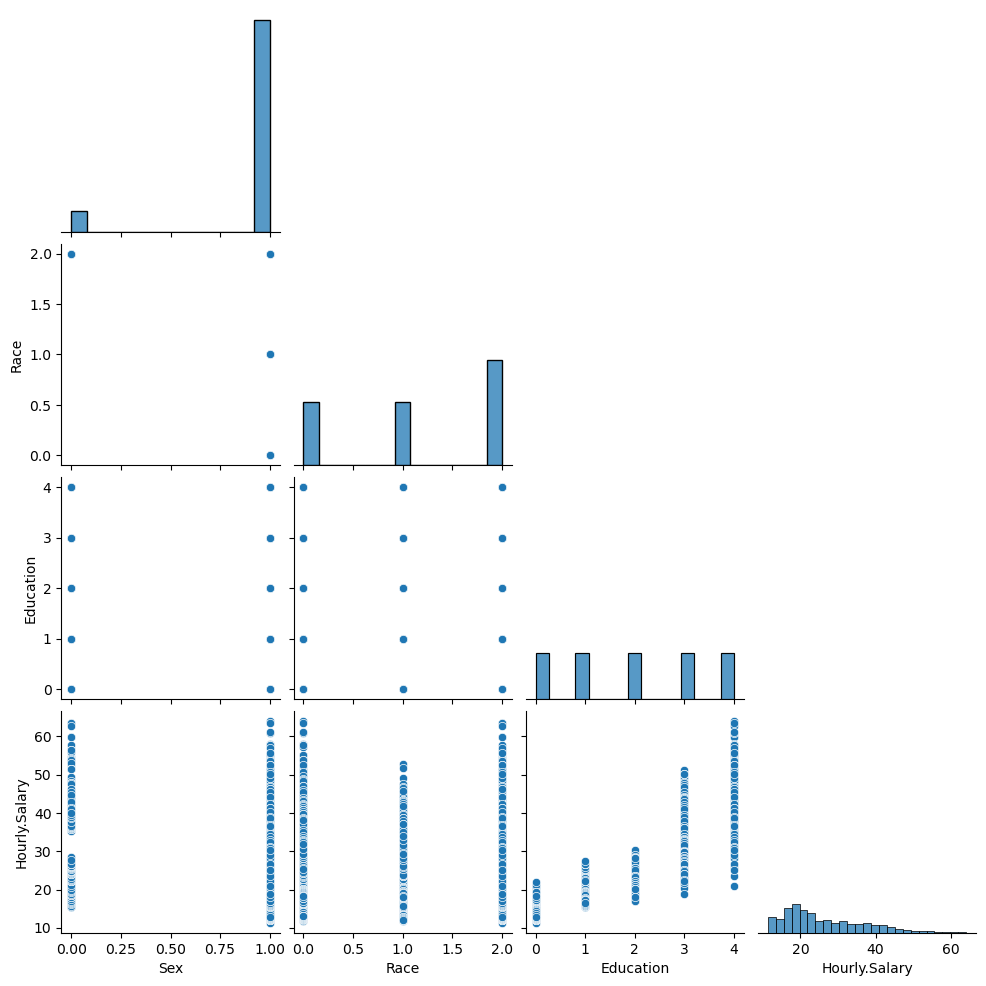

In [61]:
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pairplot(df_melt, corner = True)
plt.show();

The only obvious feature showing a relationship with salary is *Education*. The higher the education level, the higher the salary. The relationship between salary and the other two features is not that clear from the graphs, with the exception of the negative relation between salary and 'black' racial group. 

Let's see if pearson correlation coefficient will give us more clarity.

In [62]:
r, p = pearsonr(df_num['Sex'], df_num['Hourly.Salary'])

print(f"Pearson correlation between Sex and Salary: {r:.3f}")
print(f"P-value: {p:.4f}")


Pearson correlation between Sex and Salary: -0.162
P-value: 0.0000


In [63]:
r, p = pearsonr(df_num['Race'], df_num['Hourly.Salary'])

print(f"Pearson correlation between Race and Salary: {r:.3f}")
print(f"P-value: {p:.4f}")

Pearson correlation between Race and Salary: -0.070
P-value: 0.0003


In [64]:
r, p = pearsonr(df_num['Education'], df_num['Hourly.Salary'])

print(f"Pearson correlation between Education and Salary: {r:.3f}")
print(f"P-value: {p:.4f}")

Pearson correlation between Education and Salary: 0.871
P-value: 0.0000


So, while we see a strong positive correlation between education levels and the salary rates, `corr = 0.871`, the correlation between salary and race or sex is not as strong, with sex having a stronger negative correlation with salary rates than race, `-0.162` vs `-0.070`. 

The following show that there is no relation between education, and the other two independent variables:

In [65]:
r, p = pearsonr(df_num['Education'], df_num['Sex'])

print(f"Pearson correlation between Education and Sex: {r:.3f}")
print(f"P-value: {p:.4f}")

Pearson correlation between Education and Sex: -0.000
P-value: 1.0000


In [66]:
r, p = pearsonr(df_num['Education'], df_num['Race'])

print(f"Pearson correlation between Education and Race: {r:.3f}")
print(f"P-value: {p:.4f}")

Pearson correlation between Education and Race: -0.000
P-value: 1.0000


<hr style="border: 1px solid #333;" />
